In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Rejection sampling

Use proposal function to generate additional samples that distribution density looks like original samples

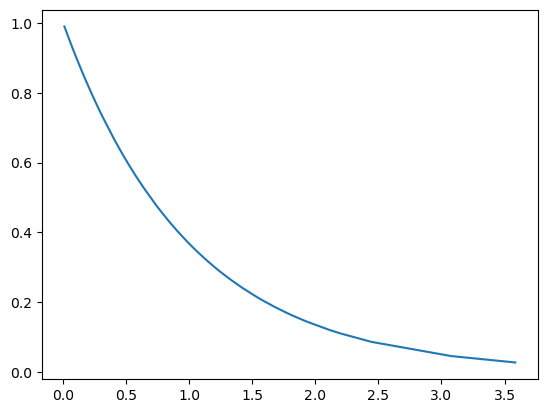

In [45]:
# samples from lab 5

size = 100
scale = 1
exponential_samples = np.array(sorted(np.random.exponential(scale, size)))

def exponential_density(data, scale):
    return scale*(np.exp(-scale*data))

def exponential_probability(data, scale):
    return 1 - np.exp(-scale*data)

plt.plot(exponential_samples, exponential_density(exponential_samples, scale))

## Find coefficient C so that original function values would be inside proposal function 

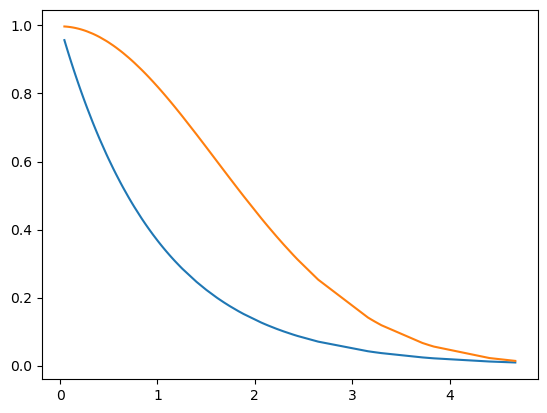

In [25]:
def normal_pdf(data, mean, std):
    return np.exp(-0.5*((data - mean)/std)**2)/(2*np.pi*std**2)**0.5

plt.plot(exponential_samples, exponential_density(exponential_samples, scale))
plt.plot(exponential_samples, normal_pdf(exponential_samples, 0, 1.6)*4)

## Sample points for exponential pdf

In [89]:
def curry_args(func, **kwargs):
    def args_inserter(data):
        return func(data, **kwargs)
    return args_inserter

curried_expon = curry_args(exponential_probability, scale=1)

In [90]:
curried_expon(0.5)


0.3934693402873666

In [ ]:



def rejection_sample(proposal_function, original_function, size, mean, std, C):

     accepted_samples = np.array([])
     while len(accepted_samples) < size:
          U = np.random.uniform(0, 1, size)
          samples = np.random.normal(mean, std, size)
          mask =np.logical_and(original_function(samples)/(proposal_function(samples)*C) > U, samples>0)
          accepted_samples = np.append(accepted_samples, samples[mask])

     return accepted_samples

In [71]:
def rejection_sample(proposal_function, original_function, size, scale, mean, std, C):

     accepted_samples = np.array([])
     while len(accepted_samples) < size:
          U = np.random.uniform(0, 1, size)
          samples = np.random.normal(mean, std, size)
          mask =np.logical_and(original_function(samples, scale)/(proposal_function(samples, mean,std)*C) > U, samples>0)
          accepted_samples = np.append(accepted_samples, samples[mask])

     return accepted_samples

In [76]:
new_samples = rejection_sample(normal_pdf, exponential_density, 30,  1, 0, 1.6, 4)

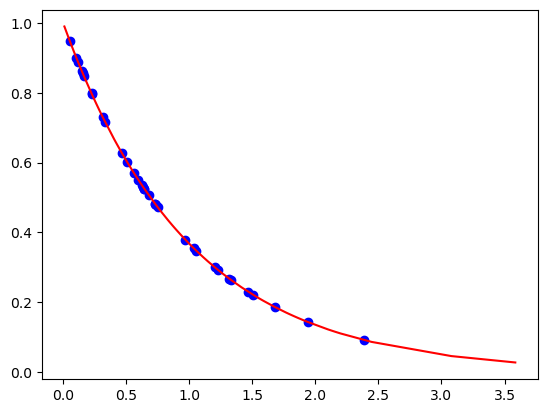

In [77]:
plt.plot(exponential_samples, exponential_density(exponential_samples, scale), color="r")
plt.scatter(new_samples, exponential_density(new_samples, scale), color="b")

# Metropolis-Gastings 

generate yt dependent on some variable xt-1 from original distribution using proposed sampler

calculate probability of new y by calculating Pt = min(f(yt)*q(xt-1|yt)/f(xt-1)q(yt|xt-1), 1)

take acceptance variable ut from uniform distribution U(0, 1)

if ut <= Pt: accept and xt = yt

repeat until required number of samples would not be accumulated

In [111]:
def Metropolis_Gastings(original_density, sampling_density, size, xt):

    accepted_samples = np.array([])

    while len(accepted_samples)<size:

        yt = sampling_density(xt)
        pt = min(
            (original_density(yt)*sampling_density(yt))/(original_density(xt)*sampling_density(xt)), 1)

        u = np.random.uniform(0, 1, 1)

        if pt > u:
            accepted_samples = np.append(accepted_samples, yt)
            xt = yt

    return accepted_samples

    
def curry_args(func, **kwargs):
    def args_inserter(**seckwargs):
        return func(**seckwargs, **kwargs)
    return args_inserter

In [100]:
    
def curry_args(func, **kwargs):
    def args_inserter(**seckwargs):
        return func(**seckwargs, **kwargs)
    return args_inserter

curried_norm = curry_args(np.random.normal, size=1, scale = 1.6)

In [106]:
curried_norm(loc=0)

array([0.91223501])

In [107]:
np.random.normal(size=1, scale = 1.6, loc=0)

array([0.55582629])

In [108]:
curried_expon = curry_args(exponential_probability, scale=1)

In [109]:
curried_expon(data=1)

0.6321205588285577

In [110]:
exponential_probability(1, 1)

0.6321205588285577